In [1]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'formula-1-2023-season:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F2956388%2F5110692%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240520%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240520T150014Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D901f35ea3d913dc344dbaeadd7645a29c77bf128eeb2c543a6895ef9781f3e169ea048685aba3d725333105a34916720dff97d034abb7791b60f74014e495138bce88194fccf3734127f1f15c2a367c96fea12b2a3b6aeb63f24e466861199d8e3bfdfa9e8f7a329647fb106ad14172e3e91b01ba66653cf969e19a7219b304bba2512119af41068704a1d2127ed95f3d8a20b9bb24ab30c439f06879554067c29f1a3454326f33e64e0c9e7d1b69700a2cea4545381af687414fa0db603c418d70c55ab2f745e647c471ea4cab32a1b62e662157fe05499af5fd66668757caee29dc29d42ffad0778344d4f68998c3a73f501ef34ae9cbea42d6c2091b4e575'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 167450 bytes downloaded
Downloaded and uncompressed: formula-1-2023-season
Data source import complete.


In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/formula-1-2023-season/schedule.csv
/kaggle/input/formula-1-2023-season/2022/Austria/race-result.csv
/kaggle/input/formula-1-2023-season/2022/Austria/pit-stop-summary.csv
/kaggle/input/formula-1-2023-season/2022/Austria/practice-1.csv
/kaggle/input/formula-1-2023-season/2022/Austria/practice-3.csv
/kaggle/input/formula-1-2023-season/2022/Austria/starting-grid.csv
/kaggle/input/formula-1-2023-season/2022/Austria/qualifying.csv
/kaggle/input/formula-1-2023-season/2022/Austria/fastest-laps.csv
/kaggle/input/formula-1-2023-season/2022/Austria/practice-2.csv
/kaggle/input/formula-1-2023-season/2022/Mexico/race-result.csv
/kaggle/input/formula-1-2023-season/2022/Mexico/pit-stop-summary.csv
/kaggle/input/formula-1-2023-season/2022/Mexico/practice-1.csv
/kaggle/input/formula-1-2023-season/2022/Mexico/practice-3.csv
/kaggle/input/formula-1-2023-season/2022/Mexico/starting-grid.csv
/kaggle/input/formula-1-2023-season/2022/Mexico/qualifying.csv
/kaggle/input/formula-1-2023-season/202

In [3]:
file_path = "/kaggle/input/formula-1-2023-season"

driver_dict = {0: 'Max\nVerstappen\nVER',
              3: 'George\nRussell\nRUS',
              1: 'Charles\nLeclerc\nLEC',
              5: 'Lewis\nHamilton\nHAM',
              2: 'Sergio\nPerez\nPER',
              4: 'Carlos\nSainz\nSAI',
              7: 'Esteban\nOcon\nOCO',
              8: 'Fernando\nAlonso\nALO',
              10: 'Daniel\nRicciardo\nRIC',
              9: 'Valtteri\nBottas\nBOT',
              6: 'Lando\nNorris\nNOR',
              11: 'Sebastian\nVettel\nVET',
              17: 'Zhou\nGuanyu\nZHO',
              14: 'Lance\nStroll\nSTR',
              16: 'Yuki\nTsunoda\nTSU',
              18: 'Alexander\nAlbon\nALB',
              15: 'Mick\nSchumacher\nMSC',
              12: 'Kevin\nMagnussen\nMAG',
              13: 'Pierre\nGasly\nGAS',
              19: 'Nicholas\nLatifi\nLAT',
              20: 'Nyck\nDe Vries\nDEV',
              21: 'Nico\nHulkenberg\nHUL'}

inv_driver = {v: k for k, v in driver_dict.items()}

constructor_dict = {0: 'Red Bull Racing RBPT',
                    1: 'Ferrari',
                    2: 'Mercedes',
                    3: 'Alpine Renault',
                    4: 'McLaren Mercedes',
                    5: 'Alfa Romeo Ferrari',
                    6: 'Aston Martin Aramco Mercedes',
                    7: 'Haas Ferrari',
                    8: 'AlphaTauri RBPT',
                    9: 'Williams Mercedes'}

inv_constructor = {v: k for k, v in constructor_dict.items()}

rounds = ["Bahrain", "Saudi-Arabia", "Australia", "imola", "Miami", "Spain", "Monaco", "Azerbaijan", "Canada", "Great-Britain", "Austria", "France", "Hungary", "Belgium", "Netherlands", "Italy", "Singapore", "Japan", "United-States", "Mexico", "Brazil", "Abu-Dhabi"]

def index_by_driver(df):
  df["driver_id"] = df["Driver"].map(inv_driver)
  df["constructor_id"] = df["Car"].map(inv_constructor)
  df = df.sort_values("driver_id")
  df = df.set_index("driver_id")

  return df

import datetime as dt

def get_total_seconds(stringHMS):
  try:
    timedeltaObj = dt.datetime.strptime(stringHMS, "%M:%S.%f") - dt.datetime(1900,1,1)
    return timedeltaObj.total_seconds()
  except:
    return float("nan")

In [4]:
df0 = index_by_driver(pd.read_csv(file_path + "/2022/Bahrain/race-result.csv"))

df0

,Unnamed: 0,Pos,No,Driver,Car,Laps,Time/Retired,PTS,Unnamed: 8,constructor_id
driver_id,,,,,,,,,,
0,NaN,19,1,Max\nVerstappen\nVER,Red Bull Racing RBPT,54,DNF,0,NaN,0
1,NaN,1,16,Charles\nLeclerc\nLEC,Ferrari,57,1:37:33.584,26,NaN,1
2,NaN,18,11,Sergio\nPerez\nPER,Red Bull Racing RBPT,56,DNF,0,NaN,0
3,NaN,4,63,George\nRussell\nRUS,Mercedes,57,+11.211s,12,NaN,2
4,NaN,2,55,Carlos\nSainz\nSAI,Ferrari,57,+5.598s,18,NaN,1
5,NaN,3,44,Lewis\nHamilton\nHAM,Mercedes,57,+9.675s,15,NaN,2
6,NaN,15,4,Lando\nNorris\nNOR,McLaren Mercedes,57,+56.335s,0,NaN,4
7,NaN,7,31,Esteban\nOcon\nOCO,Alpine Renault,57,+19.423s,6,NaN,3
8,NaN,9,14,Fernando\nAlonso\nALO,Alpine Renault,57,+22.390s,2,NaN,3


In [5]:
df_final = pd.DataFrame()

for gp in rounds:
  df = pd.DataFrame()

  fp1 = index_by_driver(pd.read_csv(file_path + "/2022/" + gp + "/practice-1.csv"))
  fp2 = index_by_driver(pd.read_csv(file_path + "/2022/" + gp + "/practice-2.csv"))
  fp3 = index_by_driver(pd.read_csv(file_path + "/2022/" + gp + "/practice-3.csv"))
  q = index_by_driver(pd.read_csv(file_path + "/2022/" + gp + "/qualifying.csv"))
  grid = index_by_driver(pd.read_csv(file_path + "/2022/" + gp + "/starting-grid.csv"))
  race = index_by_driver(pd.read_csv(file_path + "/2022/" + gp + "/race-result.csv"))

  df["driver_id"] = race.index
  df["constructor_id"] = race["constructor_id"]
  df["round"] = rounds.index(gp)

  #df["fp1_time"] = fp1["Time"].apply(get_total_seconds)
  df["fp2_time"] = fp2["Time"].apply(get_total_seconds)
  df["fp3_time"] = fp3["Time"].apply(get_total_seconds)
  #df["fp1"] = pd.to_numeric(fp1["Pos"], errors='coerce')
  df["fp2"] = pd.to_numeric(fp2["Pos"], errors='coerce')
  df["fp3"] = pd.to_numeric(fp3["Pos"], errors='coerce')

  df["q1"] = q["Q1"].apply(get_total_seconds)
  df["q2"] = q["Q2"].apply(get_total_seconds)
  df["q3"] = q["Q3"].apply(get_total_seconds)
  df["q"] = pd.to_numeric(q["Pos"], errors='coerce')
  df["grid"] = pd.to_numeric(grid["Pos"], errors='coerce')
  df["race"] = pd.to_numeric(race["Pos"], errors='coerce')

  df_final = pd.concat([df_final, df])

  if gp == rounds[0]:
    df_final = df

df_final

,driver_id,constructor_id,round,fp2_time,fp3_time,fp2,fp3,q1,q2,q3,q,grid,race
0,0,0.0,0,91.936,92.544,1.0,1.0,91.785,90.757,90.681,2.0,2.0,19.0
1,1,1.0,0,92.023,92.640,2.0,2.0,91.471,90.932,90.558,1.0,1.0,1.0
2,2,0.0,0,92.958,92.791,7.0,3.0,92.311,91.008,90.921,4.0,4.0,18.0
3,3,2.0,0,92.529,92.935,4.0,4.0,92.269,91.252,92.216,9.0,9.0,4.0
4,4,1.0,0,92.520,93.053,3.0,5.0,91.567,90.787,90.687,3.0,3.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15,15,7.0,21,86.839,86.473,17.0,18.0,85.711,85.225,NaN,13.0,12.0,16.0
16,16,8.0,21,86.680,86.170,15.0,13.0,85.630,85.219,NaN,12.0,11.0,11.0
17,17,5.0,21,86.479,86.482,13.0,19.0,85.594,85.408,NaN,15.0,15.0,12.0
18,18,9.0,21,86.750,86.051,16.0,10.0,86.028,NaN,NaN,19.0,19.0,13.0


In [6]:
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier

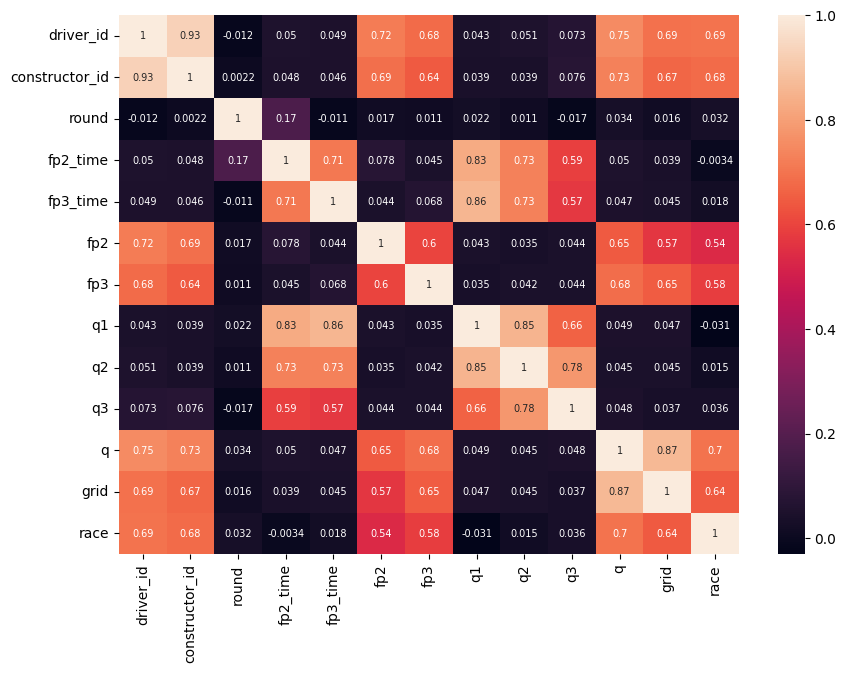

In [19]:
df_final2 = df_final.apply(lambda x: x.fillna(round(x.mean())), axis=0)

df_final2.head()

plt.figure(figsize=(10,7))
sns.heatmap(df_final2.corr(), annot=True, mask = False, annot_kws={"size": 7})
plt.savefig("corr.png", format="png")
plt.show()

In [9]:
correlations = df_final2.corr()['race'].sort_values(ascending=False)

# Display
print(correlations)

race              1.000000
q                 0.696839
driver_id         0.694256
constructor_id    0.680070
grid              0.642502
fp3               0.581352
fp2               0.535396
q3                0.035578
round             0.032207
fp3_time          0.018356
q2                0.014674
fp2_time         -0.003361
q1               -0.030637
Name: race, dtype: float64


In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


lab = LabelEncoder()

train_df = df_final2[(df_final2["round"] <= 15)]
val_df = df_final2[(df_final2["round"] >= 16) & (df_final2["round"] <= 18)]
test_df = df_final2[(df_final2["round"] >= 19)]

X_train = train_df[train_df.columns.tolist()[:-1]].values
y_train = lab.fit_transform(train_df['race'].values)
X_val = val_df[train_df.columns.tolist()[:-1]].values
y_val = lab.fit_transform(val_df['race'].values)
X_test = test_df[train_df.columns.tolist()[:-1]].values
y_test = lab.fit_transform(test_df['race'].values)

Accuracy: 0.1


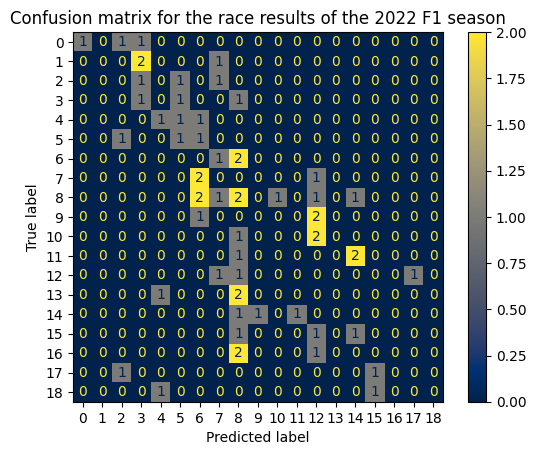

In [20]:
from sklearn.tree import DecisionTreeClassifier

dcf = DecisionTreeClassifier(random_state=67).fit(X_train, y_train)
guess = dcf.predict(X_test)

#Create a confuson matrix from the results of our DCF
cm = confusion_matrix(y_test, guess)

#Visualizing the confusion matrix
map = ConfusionMatrixDisplay(cm)#, display_labels=classes)
map.plot(cmap="cividis")
#Formatting
plt.title("Confusion matrix for the race results of the 2022 F1 season")
#Displaying

acc = 0

for i in range(19):
  acc += cm[i][i]

print("Accuracy: " + str(acc/60))
plt.savefig("dcf.png", format="png")
plt.show()

In [21]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestRegressor

clf = RandomForestRegressor()

# Train the model
clf.fit(X_train, y_train)

# Make predictions on test data
y_pred = np.round(clf.predict(X_test))

for i in range(30):
  print("%d, %s, %s" % (i, y_pred[i], y_test[i]))

0, 2.0, 0
1, 3.0, 5
2, 3.0, 2
3, 3.0, 3
4, 3.0, 4
5, 3.0, 1
6, 8.0, 8
7, 8.0, 7
8, 9.0, 18
9, 7.0, 9
10, 9.0, 6
11, 12.0, 13
12, 13.0, 16
13, 12.0, 10
14, 13.0, 14
15, 12.0, 15
16, 11.0, 8
17, 11.0, 12
18, 12.0, 11
19, 15.0, 17
20, 2.0, 5
21, 6.0, 3
22, 5.0, 6
23, 3.0, 0
24, 4.0, 2
25, 5.0, 1
26, 6.0, 8
27, 7.0, 7
28, 7.0, 4
29, 11.0, 8


Accuracy: 0.13333333333333333


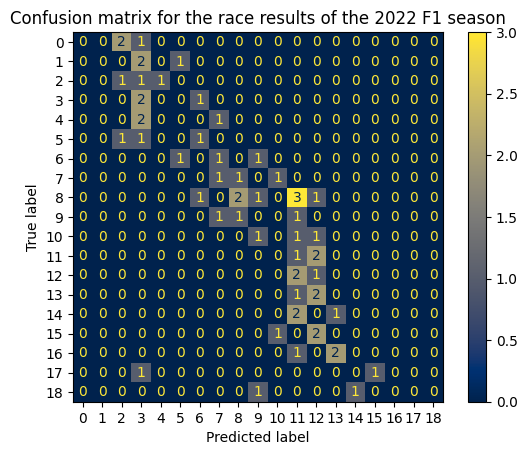

In [22]:
#Create a confuson matrix from the results

#Visualizing the confusion matrix
map = ConfusionMatrixDisplay(cm)#, display_labels=classes)
map.plot(cmap="cividis")
#Formatting
plt.title("Confusion matrix for the race results of the 2022 F1 season")

acc = 0

for i in range(19):
  acc += cm[i][i]

print("Accuracy: " + str(acc/60))

#Displaying
plt.savefig("rf.png", format="png")
plt.show()

# Things to try

In [14]:
import joblib
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, ParameterGrid
from sklearn.metrics import log_loss

# Dictionary to store the best model and test accuracy for each algorithm
model_accuracy_info = {}

param_grid = {
    'LogisticRegression': {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'random_state': [42], 'multi_class': ['multinomial']},
    'RandomForestClassifier': {'n_estimators': [10, 50, 100], 'max_depth': [None, 10, 20, 30], 'random_state': [42]},
    'KNeighborsClassifier': {'n_neighbors': [3, 5, 7, 10], 'metric': ['euclidean', 'manhattan']},
    'DecisionTreeClassifier': {'max_depth': [None, 5, 10, 15, 20], 'random_state': [42]}
}

# Initialize models
models = {
    'LogisticRegression': LogisticRegression(),
    'RandomForestClassifier': RandomForestClassifier(),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'DecisionTreeClassifier': DecisionTreeClassifier()
}

# Function to manually tune hyperparameters
def tune_hyperparameters(model, params, X_train, y_train, X_val, y_val):
    best_model = None
    best_params = {}
    best_log_loss = float('inf')
    for param in ParameterGrid(params):
        model.set_params(**param)
        model.fit(X_train, y_train)
        probabilities = model.predict_proba(X_val)
        log_loss_val = log_loss(y_val, probabilities, labels=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19])
        if log_loss_val < best_log_loss:
            best_log_loss = log_loss_val
            best_model = model
            best_params = param
    return best_model, best_params

# Perform hyperparameter tuning and evaluation
for name, model in models.items():
    print(f"Model: {name}\n")
    if name in param_grid:
        # Tune hyperparameters
        best_model, best_params = tune_hyperparameters(model, param_grid[name], X_train, y_train, X_val, y_val)
        print(f"Best parameters for {name}: {best_params}")
        model = best_model
    else:
        # Fit model with default parameters
        model.fit(X_train, y_train)

    # Predict and evaluate on test data
    pred_test = model.predict(X_test)
    probabilities_test = model.predict_proba(X_test)
    log_loss_test = log_loss(y_test, probabilities_test, labels=range(19))
    accuracy_test = accuracy_score(y_test, pred_test)
    print(f"Test Log Loss for {name}: {log_loss_test:.4f}")
    print(f"Test Accuracy for {name}: {accuracy_test:.4f}")

    model_filename = f"{name}_model_multiClass.joblib"
    joblib.dump(model, model_filename)
    model_accuracy_info[name] = {
        'model': model_filename,
        'log_loss': log_loss_test,
        'accuracy': accuracy_test
    }

    # Display confusion matrix
    ConfusionMatrixDisplay.from_predictions(y_test, pred_test)
    plt.title(f"Confusion Matrix for {name} on Test Data")
    plt.show()
    print("\n\n\n")

# Print model and accuracy info
for model_name, info in model_accuracy_info.items():
    print(f"Model: {model_name}, File: {info['model']}, Test Log Loss: {info['log_loss']:.4f}, Test Accuracy: {info['accuracy']:.4f}")

Model: LogisticRegression



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Best parameters for LogisticRegression: {'C': 0.001, 'multi_class': 'multinomial', 'random_state': 42}


ValueError: The number of classes in labels is different from that in y_pred. Classes found in labels: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18]